# Estudo para a prova:
## Sumario:
### Pipeline ML
#### 1- Definir o problema
##### - Qual é a tarefa que queremos ensinar um computador a fazer?
#### 2- Coletar os dados
##### - Escolher uma base de dados do gagle basica para testes
##### - Dividir os dados de teste em 3 grupos: Treino, Validação e Teste
#### 3- Extração de Características (features)
##### - Avaliar as caracteriticas importantes da base estudada
##### - Não é uma tarefa fácil.
#### 4- Treinamento do modelo
##### - Usar o conjunto de testes para isso
#### 5- Testar o desempenho do modelo treinado
##### - Usar o conjunto de testes para isso
##### - medir a sua capacidade de generalização ao classificar outras imagens de cães e gatos não apresentados na etapa de treinamento

In [1]:
#!pip install torch
#!pip install opencv-python



### 3. Preparação dos dados
### - Uma regra comum é que 80% do projeto é a preparação de dados
#### ❑ Selecionar dados: Determine quais os conjuntos de dados serão usados e documente os motivos da inclusão/exclusão
#### ❑ Limpeza de dados
##### ❑ Corrigir oou remover outiliers (opcional)
##### ❑ Preencher valores ausentes (missing values) ou eliminar suas instâncias (ou colunas)
#### ❑ Seleção de características (opcional): eliminar (“dropa”) os atributos que não fornecem informações úteis para a tarefa
#### ❑ Engenharia de Atributos ou de características (Feature Engineering): reformatar os dados conforme necessário. Por exemplo, discretizar características contínuas, realizar transformações (ex.: log(x), sqrt(x), etc.), compor novas características a partir das existentes, padronizar ou normalizar as características, etc
### - Boas práticas:
#### • Trabalhe com as cópias dos dados
#### • Escreva funções para todas as transformação de dados que for aplicar. Motivos
#### • Preparar facilmente os dados da próxima vez que obtiver um novo conjunto de dados
#### • Aplicar essas transformações em projetos futuros para: Limpar e preparar o conjunto de teste, limpar e preparar novas instâncias de dados quando a solução estiver em produção
#### • Facilitar as escolhas como hiperparâmetros

### 4. Modelagem
#### 1. Treine muitos modelos rápidos e simples de diferentes categorias (ex.: linear, Naive Bayes, SVM, random florest, rede neural, etc) usando parâmetros-padrão
#### 2. Medir e comparar o desempenho (ex: média e desvio-padrão do erro). Para cada modelo é interessante usar a validação cruzada k-fold
#### 3. Analise as variáveis mais significativas para cada algoritmo
#### 4. Analise os erros que os modelos cometem
#### 5. Execute uma rodada rápida de seleção de características e feature engineering
#### 6. Rode mais uma ou duas iterações rápidas das 5 etapas anteriores
#### 7. Faça uma pré-seleção de 3 à 5 modelos com melhor desempenho

### 5. Avaliação
#### ❑ Avalie os resultados: Os modelos atendem aos critérios de sucesso do negócio? Qual(is) devemos aprovar para o negócio?
#### ❑ Processo de revisão: Revise o trabalho realizado. Alguma coisa foi esquecida? Todas as etapas foram executadas corretamente? Resuma as descobertas e corrija qualquer coisa, se necessário
#### ❑ Apresente sua solução. Documentar o que foi feito, explicar porque sua solução alcança o objetivo do negócio, etc
#### ❑ Determine as próximas etapas: Com base nas três tarefas anteriores, determine se deve continuar com a implantação, iterar mais ou iniciar novos projetos Importante: não ajuste seu modelo depois de medir o erro de generalização: você simplesmente começaria a ajustar o conjunto de teste

### 6. Implantação
#### ❑ Planejar a implantação: Desenvolva e documente um plano para implantar o modelo.
#### ❑ Plano de monitoramento e manutenção: Desenvolva um plano completo de monitoramento e manutenção para evitar problemas durante a fase operacional (ou fase pós-projeto) de um modelo.
#### ❑ Produzir relatório final: A equipe do projeto documenta um resumo do projeto que pode incluir uma apresentação final dos resultados da mineração de dados.
#### ❑ Revisão do projeto: Conduza uma retrospectiva do projeto sobre o que deu certo, o que poderia ter sido melhor e como melhorar no futuro

# Aplicando Imports

In [2]:
# para tratar arquivos e diretorios
import os

#para tratar numeros e arrays
import numpy as np
import pandas as pd

#para tratar imagens
import cv2

#para plotar graficos
import matplotlib.pyplot as plt

# 1 Entendimento do negocio

## Defina o objetivo em termos de negócios
- Ao buscar na internet soluções em graficos é necessario que haja uma forma automatizada de encontrar graficos e defini-los
- Há também a possibilidade de gerar uma metrica de quantidade de graficos e suas relações, e por fim aplicar um verificador de graficos.

## Como a solução será usada?
- Como ferramenta de busca de graficos em determinado escopo ou como ferramenta de enssino.

## Quais as soluções/alternativas atuais (caso existam)?
- atualmente algumas ferramentas de busca já realizam a comparação entre imagens e muitas até usam isso, mas a proposta é apresentar uma ferramenta apropriada para esse tipo de reconhecimento: Definir o tipo de grafico.

## Como você deve abordar este problema (supervisionado/não supervisionado, etc)?
- Aprendizado supervisionado: busco encontrar predições a partir de imagens.
- Usarei tecnicas de deepLearning.

## Como o desempenho deve ser medido?
- Matrizes de confusão e metricas como percentual de acerto, etc.

## A medida de desempenho está alinhada com o objetivo do negócio?
- Sim, o algoritmo precisa de acurácia 

## Qual seria o desempenho mínimo para alcançar o objetivo
- acima de 90% de acerto seria um resultado.
- porém, busca-se valores acima de 95% 

## Tem especialista humano disponível?
- Eu mesmo posso definir e diferenciar determinados graficos.

## É possível reutilizar experiências ou ferramentas de outros contextos?
- o Google é uma caixa-preta, não posso usar o algoritmos deles aqui, porem já existem trabalhos neste sentido, mas ainda não consegui usá-los.

## Como você resolveria o problema manualmente
- Manualmente seria uma tarefa muito simples, ao visualizar um grafico eu definiria seu tipo, porem para fazer isso em muitas imagens isso poderia demanfdar muito tempo.

## Produza um plano do projeto selecionando as tecnologias e ferramentas e definindo planos detalhados para cada fase do projeto

### Planejamento
- Este projeto tem como finalidade desenvolver uma ferramenta de deeplearn capaz de diferenciar alguns tipos de graficos e propiciar uma predição apartir de dada uma imagem, ter como resposta um grafico.

#### Tecnologias
- para isso usarei algumas ferramentas:
    - Anaconda, para ser usada como ambiente de desenvoolvimento e facilitar o import de diversas libs.
    - A "IDE" Jupyter Lab / Jupyter Notebook para o sesemvolvimento estruturado e para a apresentação de resultados.
    - A linguagem de de sexemvolvimento Python 3.9
    - Dados encontrados na plataforma kaggle.
    
#### Ferramentas
- como ferrementas vou usar algumas libs:
    - TensorFlow, para aplicar o deeplearn
    - cv2, para tratamento de imagens
    - 
    
#### Detalhamento das fazes do projeto
1. encontrar imagens para serem usadas como dados da ferramenta.
2. tratar esses dados
    - possivelmente as imgens virão todas juntas em uma unica pastas, separá-las sera um pequeno desafio.
    - Definir quais imagems podem ser usadas e quais não podem.
    - Realizar um tratamento nas imagens para encontrar resultados validos.
3. Desenvolver o algoritmo para reconhecimento de imagens.
4. testar o algoritmo usando dados separados para esse fim.
5. Desenvolver uma ferramamenta mobile que realize o reconhecimento.

# 2. Compreensão dos dados
## Colete os dados de que você precisa e de quanto precisa.
- Os dados foram encontrados no seguinte endereço: [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)
- Para o meu projeto eu preferi baixar os dados.

## Verifique quanto de espaço esses dados ocuparão e obtenha autorização de uso, se necessário, assegurando que as informações confidencias sejam excluídas ou protegidas (ex. deixando-as anônimas)
- Os dados possuem o tamanho aproximado de 1.09GB, relativamente pequeno.
- não são daodos sensiveis e não necessitam de alteração.
- há apenas o pedido de citação dos dados.  [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)

## Descreva os dados: examine os dados e documente suas propriedades, como formato de dados, número de registros ou identidades de campo
- Os dados são separados em 8 classes:
    - 0 - **just image**: Apenas uma imagem sem qualquer grafico
    - 1 - **bar chart**: Grafico de barras
    - 2 - **diagram**: diagrmas
    - 3 - **flow chart**: graficos de fluxo
    - 4 - **graph**: apenas um grafico
    - 5 - **growth chart**: grafico de crescimento
    - 6 - **pie chart**: grafico de pizza
    - 7 - **table**: tabela

### Trata-se e um conjunto de imagens:
- A quantidade de imagens diversas:

In [3]:
#diretorio_imagens = '/Users/User/Documents/Projetos/Imagens/listdirlistdir/'
diretorio_imagens = '/home/filipedc/Documentos/Programação/python/projetoML/projetoML/graphs/'
dados = os.listdir(diretorio_imagens)


##### OBS: Para facilitar o uso do data set vamos criar um dataframa usando pandas.

In [4]:

nome_classes = [
    "just_image", 
    "bar_chart", 
    "diagram", 
    "flow_chart", 
    "graph", 
    "growth_chart", 
    "pie_chart",
    "table"
]

dataset = []

for i in dados:
    for j in range(len(nome_classes)):
        if nome_classes[j]+"_" in i:
            
            tipo = i.split(".")[-1]
            
            if  tipo != "gif":
                
                forma = cv2.imread(diretorio_imagens+i).shape
                
            else:
                
                gif = cv2.VideoCapture(diretorio_imagens+i)
                _, image = gif.read()
                forma = image.shape
            
            dataset.append(
                [
                    nome_classes[j],
                    tipo,
                    j,
                    i,
                    (os.path.getsize(diretorio_imagens+i)/1024), int(forma[0]),
                    int(forma[1])
                ]
            )
            
            break

dataset_array = np.array(dataset)

df_dataset = pd.DataFrame(
    data=dataset_array,
    columns=["classe", "tipo", "id_calsse", "nome", "tamanho_Kb", "largura", "altura"]
)


            
            

- Os dados que extraidos das imagens são:
    - A **classe** : o tipo de grafico
    - O **tipo**: o formato do arquivo
    - O **id_classe**: o idemtificador numerico da classe
    - O **nomne**: o nome do arquivo
    - O **tamanho_kb**: o tamanho do arquivo em kilobyte
    - A **largura**: a largura da imagem
    - A **altura**: a altura da imagem
   
## Explore os dados: Estude cada atributo e suas propriedades (nome, tipo, % de valores ausentes, quais atributos alvos, etc).

- Estudaremos alguns dados dos atributos extraidos

In [5]:
print("Neste projeto serão usadas %d imagens" %len(dados))

Neste projeto serão usadas 15875 imagens


- Organizados da seguinte maneira:

In [6]:
df_dataset = df_dataset.astype({"classe": "str", "tipo": "str", "id_calsse": "int32", "nome": "str", "tamanho_Kb": "float", "largura": "int32", "altura": "int32"})
df_dataset[-5:]

,classe,tipo,id_calsse,nome,tamanho_Kb,largura,altura
15870,graph,jpg,4,graph_images95 (2).jpg.jpg,24.210938,201,251
15871,bar_chart,jpg,1,bar_chart_images229 (4).jpg.jpg,36.186523,192,262
15872,flow_chart,jpg,3,flow_chart_images487 (2).jpg.jpg,12.043945,214,236
15873,bar_chart,jpg,1,bar_chart_1 (2).png.jpg,16.996094,284,465
15874,table,jpg,7,table_maxresdefault.jpg.jpg,330.635742,720,1280


- Definindo os tipos

In [7]:
df_dataset.dtypes

classe         object
tipo           object
id_calsse       int32
nome           object
tamanho_Kb    float64
largura         int32
altura          int32
dtype: object

#### Quanto ao formato do arquivo:

In [8]:
df_dataset_tipo = df_dataset.groupby(["tipo"])['tipo']\
    .count()

df_dataset_tipo

tipo
JPG        10
gif         3
jpeg        2
jpg     15763
png        96
webp        1
Name: tipo, dtype: int64

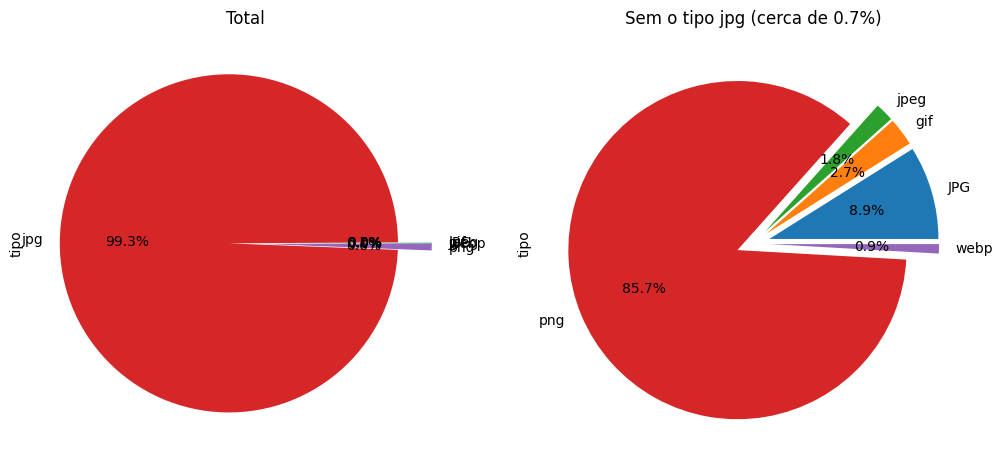

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_tipo\
    .plot\
    .pie(
        ax = axes[0],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo))]   
    )
axes[0].set_title("Total")

df_dataset_tipo\
    .drop(index='jpg')\
    .plot\
    .pie(
        ax = axes[1],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo)-1)]
    )
axes[1].set_title("Sem o tipo jpg (cerca de 0.7%)")

plt.show()

## Visualize os dados e estude a correlação entre os atributos
- Quanto a classe:

In [10]:
df_dataset_classe = df_dataset.groupby(["classe"])['classe'].count()
df_dataset_classe

classe
bar_chart       1982
diagram         2006
flow_chart      1708
graph           1913
growth_chart    1171
just_image      3174
pie_chart       1856
table           2065
Name: classe, dtype: int64

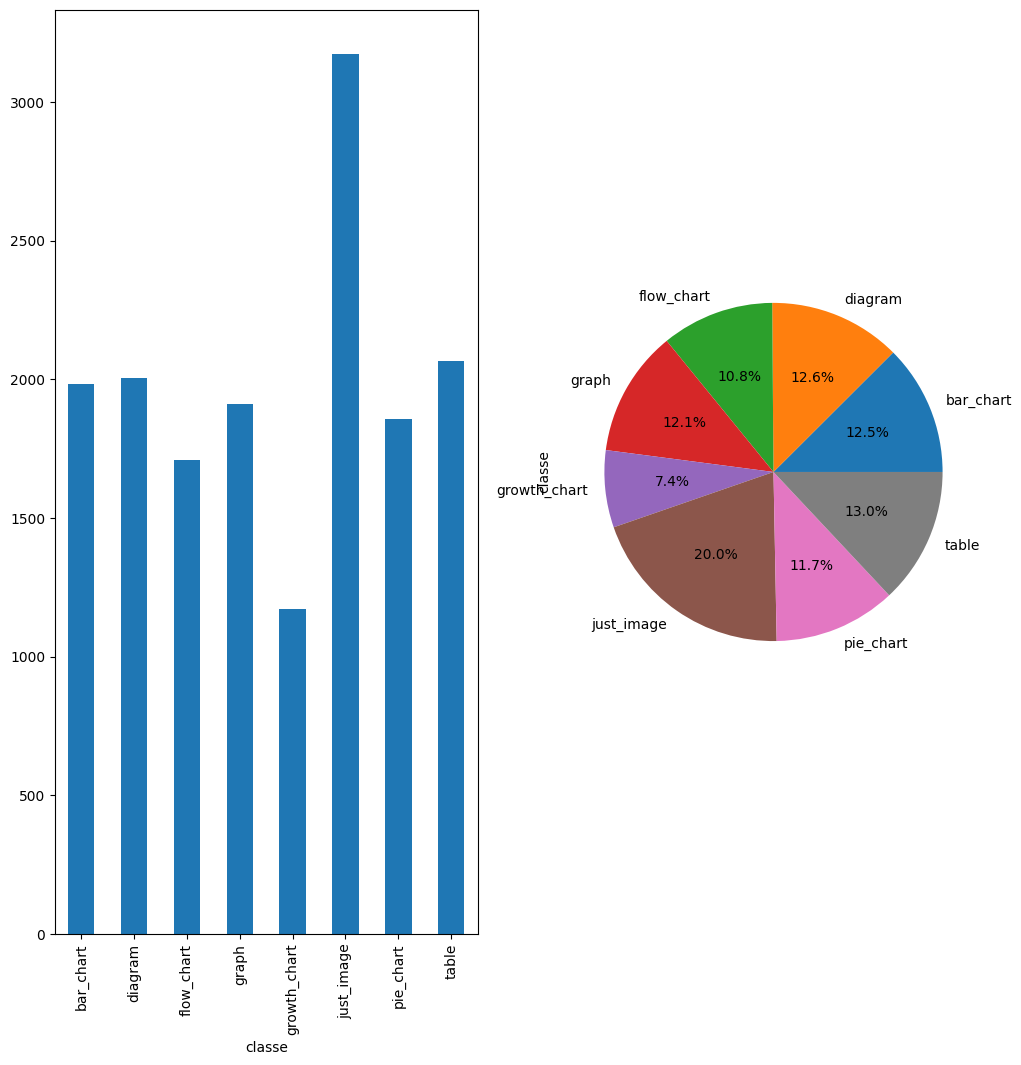

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_classe.plot.bar(ax=axes[0], figsize=(10, 10))#, autopct='%1.1f%%')
df_dataset_classe.plot.pie(ax=axes[1], figsize=(12, 12), autopct='%1.1f%%')

plt.show()

    - mosta uma certa similaridade entre as quantidades de cada tipo de classse

In [12]:
df_dataset_classe_largura_altura = df_dataset.groupby(["classe"])[["classe",'largura','altura']]
df_dataset_classe_largura_altura

In [13]:
df_dataset_classe_largura_altura.min(numeric_only=True)

,largura,altura
classe,,
bar_chart,100,100
diagram,100,100
flow_chart,87,29
graph,90,100
growth_chart,100,100
just_image,48,48
pie_chart,100,100
table,78,63


In [14]:
df_dataset_classe_largura_altura.median(numeric_only=True)

,largura,altura
classe,,
bar_chart,194.0,286.0
diagram,195.0,276.0
flow_chart,227.5,259.0
graph,201.0,266.0
growth_chart,225.0,259.0
just_image,225.0,283.0
pie_chart,195.0,275.0
table,228.0,300.0


In [15]:
df_dataset_classe_largura_altura.max(numeric_only=True)

,largura,altura
classe,,
bar_chart,3307,3638
diagram,3750,3750
flow_chart,4726,3495
graph,3750,5000
growth_chart,4000,5576
just_image,4912,6070
pie_chart,5120,5120
table,5775,7682


AttributeError: 'Series' object has no attribute 'get_figure'

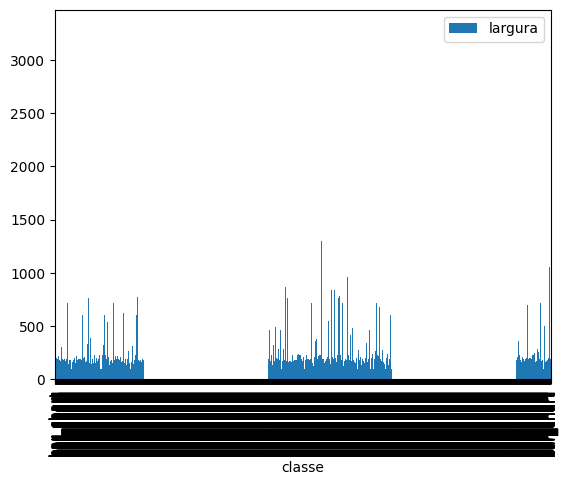

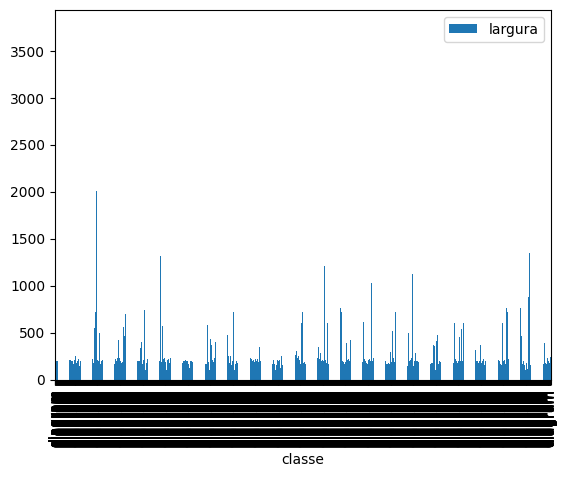

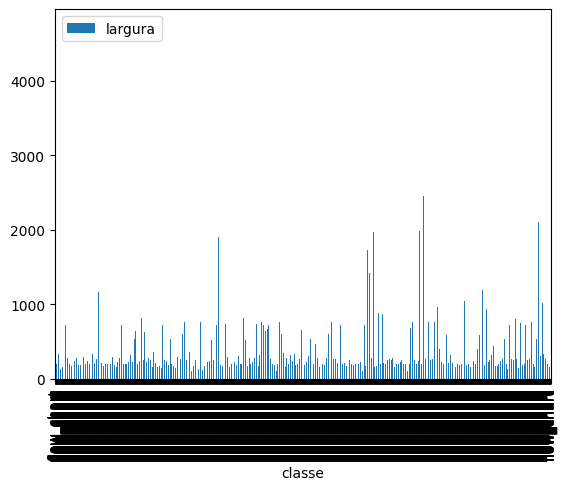

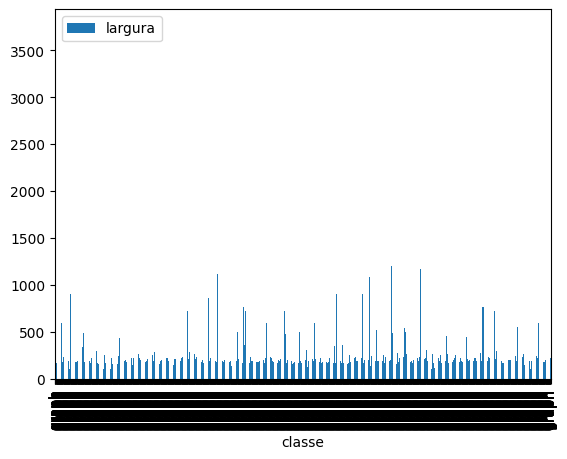

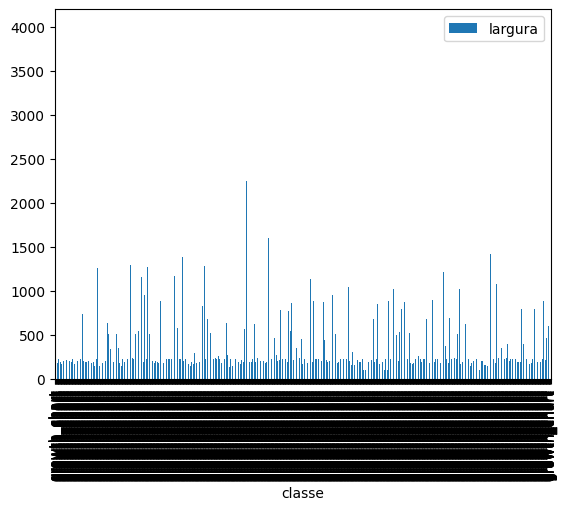

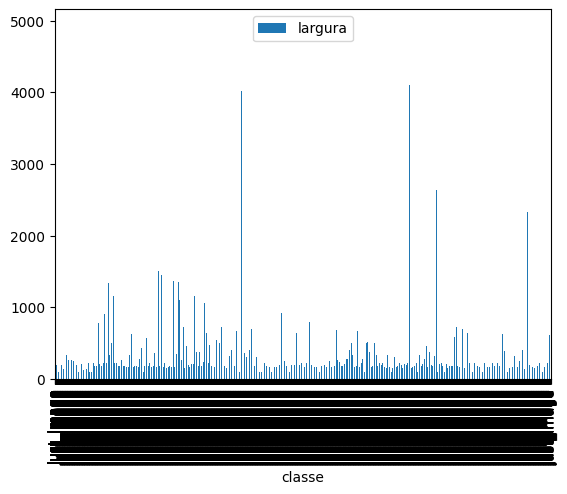

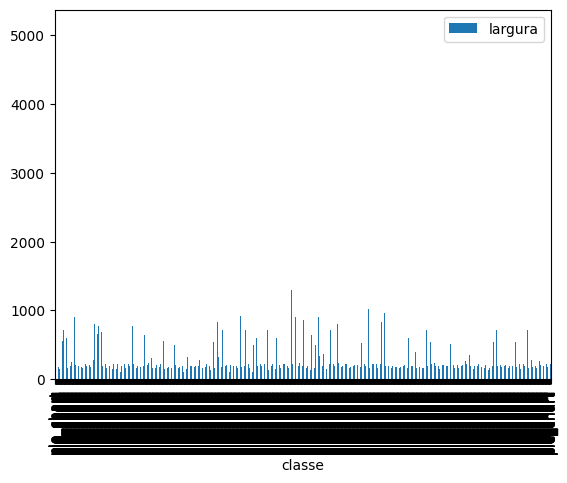

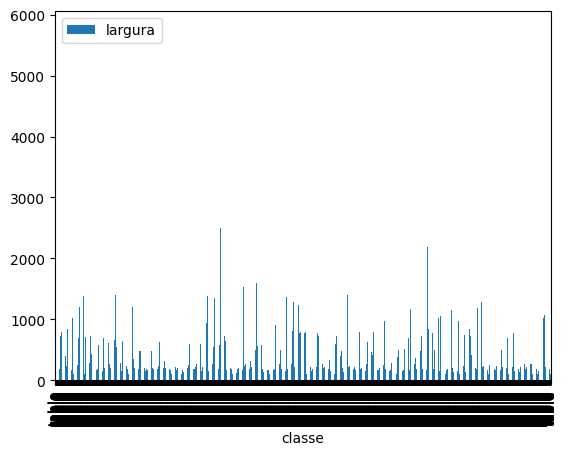

In [29]:
#plotar tamanhos
#df_dataset_classe_largura_altura.plot.pie(x="classe", y=["largura","altura"])

y = np.random.rand(10,3)
y[:,0]= np.arange(10)
df = df_dataset_classe_largura_altura

ax = df.plot(x="classe", y="largura", kind="bar")
df.plot(x="classe", y="altura", kind="bar", ax=ax, color="C2")

plt.show()

###### Separar os dados entre os dados de treino: 80% e teste: 20%

In [17]:
def imagem():
    image_name = os.path.join(self.dir_path, self.file_list[idx])
        
    if image_name.split('.')[::-1][0] == "gif":
        gif = cv2.VideoCapture(image_name)
        _, image = gif.read()
    else:
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for name, label in self.label_dict.items():
        if name in image_name.split('/')[::-1][0]:
            self.label = label
            break

    if self.transform:
        augmented = self.transform(image=image)
        image = augmented['image']

    return image, self.label

def test(a):
    print(str(a)+"coisa")
    return []#os.path.join(diretorio_imagens, a)

#df_dataset['imagem'] = df['nome'].transform(len)
df_dataset
teste = df_dataset.groupby(["tipo","nome"])["tipo","nome"].transform(test)
teste

/tmp/ipykernel_23257/274975766.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teste = df_dataset.groupby(["tipo","nome"])["tipo","nome"].transform(test)


11850    JPG
Name: tipo, dtype: objectcoisa
11850    just_image_18bb9742-565f-4a51-9252-f56e3720841...
Name: nome, dtype: objectcoisa
      tipo                                               nome
11850  JPG  just_image_18bb9742-565f-4a51-9252-f56e3720841...coisa
3462    JPG
Name: tipo, dtype: objectcoisa
3462    just_image_208f1dee-2e88-45de-9edb-c8768af8235...
Name: nome, dtype: objectcoisa
8455    JPG
Name: tipo, dtype: objectcoisa
8455    just_image_3a2e1a39-a1fa-4726-9cc5-5a617983923...
Name: nome, dtype: objectcoisa
10581    JPG
Name: tipo, dtype: objectcoisa
10581    just_image_64273fcf-a58c-4809-8d36-4fa39fb8400...
Name: nome, dtype: objectcoisa
4931    JPG
Name: tipo, dtype: objectcoisa
4931    just_image_992d85d5-3933-4a7e-8d39-ed5d94b0efd...
Name: nome, dtype: objectcoisa
14905    JPG
Name: tipo, dtype: objectcoisa
14905    just_image_bb3a35e3-c628-44ca-8fd4-8ef9f4f67ac...
Name: nome, dtype: objectcoisa
15480    JPG
Name: tipo, dtype: objectcoisa
15480    just_image_c06f8807-

2329    jpg
Name: tipo, dtype: objectcoisa
2329    bar_chart_images143.jpg.jpg
Name: nome, dtype: objectcoisa
12429    jpg
Name: tipo, dtype: objectcoisa
12429    bar_chart_images144 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6568    jpg
Name: tipo, dtype: objectcoisa
6568    bar_chart_images144 (3).jpg.jpg
Name: nome, dtype: objectcoisa
979    jpg
Name: tipo, dtype: objectcoisa
979    bar_chart_images144.jpg.jpg
Name: nome, dtype: objectcoisa
277    jpg
Name: tipo, dtype: objectcoisa
277    bar_chart_images145 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2414    jpg
Name: tipo, dtype: objectcoisa
2414    bar_chart_images145 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12223    jpg
Name: tipo, dtype: objectcoisa
12223    bar_chart_images145 (4).jpg.jpg
Name: nome, dtype: objectcoisa
736    jpg
Name: tipo, dtype: objectcoisa
736    bar_chart_images145.jpg.jpg
Name: nome, dtype: objectcoisa
10822    jpg
Name: tipo, dtype: objectcoisa
10822    bar_chart_images146 (2).jpg.jpg
Name: nome, dtype

14310    jpg
Name: tipo, dtype: objectcoisa
14310    bar_chart_images200 (3).jpg.jpg
Name: nome, dtype: objectcoisa
11171    jpg
Name: tipo, dtype: objectcoisa
11171    bar_chart_images200 (4).jpg.jpg
Name: nome, dtype: objectcoisa
10242    jpg
Name: tipo, dtype: objectcoisa
10242    bar_chart_images200.jpg.jpg
Name: nome, dtype: objectcoisa
15578    jpg
Name: tipo, dtype: objectcoisa
15578    bar_chart_images201 (2).jpg.jpg
Name: nome, dtype: objectcoisa
781    jpg
Name: tipo, dtype: objectcoisa
781    bar_chart_images201 (3).jpg.jpg
Name: nome, dtype: objectcoisa
7109    jpg
Name: tipo, dtype: objectcoisa
7109    bar_chart_images201.jpg.jpg
Name: nome, dtype: objectcoisa
13526    jpg
Name: tipo, dtype: objectcoisa
13526    bar_chart_images202 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6045    jpg
Name: tipo, dtype: objectcoisa
6045    bar_chart_images202 (3).jpg.jpg
Name: nome, dtype: objectcoisa
9892    jpg
Name: tipo, dtype: objectcoisa
9892    bar_chart_images202.jpg.jpg
Name: nom

5086    jpg
Name: tipo, dtype: objectcoisa
5086    bar_chart_images239.jpg.jpg
Name: nome, dtype: objectcoisa
13651    jpg
Name: tipo, dtype: objectcoisa
13651    bar_chart_images24 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5290    jpg
Name: tipo, dtype: objectcoisa
5290    bar_chart_images24 (3).jpg.jpg
Name: nome, dtype: objectcoisa
9157    jpg
Name: tipo, dtype: objectcoisa
9157    bar_chart_images24 (4).jpg.jpg
Name: nome, dtype: objectcoisa
1068    jpg
Name: tipo, dtype: objectcoisa
1068    bar_chart_images24.jpg.jpg
Name: nome, dtype: objectcoisa
11169    jpg
Name: tipo, dtype: objectcoisa
11169    bar_chart_images240 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13230    jpg
Name: tipo, dtype: objectcoisa
13230    bar_chart_images240 (3).jpg.jpg
Name: nome, dtype: objectcoisa
7197    jpg
Name: tipo, dtype: objectcoisa
7197    bar_chart_images240.jpg.jpg
Name: nome, dtype: objectcoisa
808    jpg
Name: tipo, dtype: objectcoisa
808    bar_chart_images241 (2).jpg.jpg
Name: nome, dtype

11289    jpg
Name: tipo, dtype: objectcoisa
11289    bar_chart_images291 (2).jpg.jpg
Name: nome, dtype: objectcoisa
9374    jpg
Name: tipo, dtype: objectcoisa
9374    bar_chart_images291 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6761    jpg
Name: tipo, dtype: objectcoisa
6761    bar_chart_images291.jpg.jpg
Name: nome, dtype: objectcoisa
8625    jpg
Name: tipo, dtype: objectcoisa
8625    bar_chart_images292 (3).jpg.jpg
Name: nome, dtype: objectcoisa
7970    jpg
Name: tipo, dtype: objectcoisa
7970    bar_chart_images293 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13534    jpg
Name: tipo, dtype: objectcoisa
13534    bar_chart_images293 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2463    jpg
Name: tipo, dtype: objectcoisa
2463    bar_chart_images293 (4).jpg.jpg
Name: nome, dtype: objectcoisa
414    jpg
Name: tipo, dtype: objectcoisa
414    bar_chart_images294 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7629    jpg
Name: tipo, dtype: objectcoisa
7629    bar_chart_images294.jpg.jpg
Name: nome,

5927    jpg
Name: tipo, dtype: objectcoisa
5927    bar_chart_images446 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7198    jpg
Name: tipo, dtype: objectcoisa
7198    bar_chart_images446.jpg.jpg
Name: nome, dtype: objectcoisa
14780    jpg
Name: tipo, dtype: objectcoisa
14780    bar_chart_images447 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10443    jpg
Name: tipo, dtype: objectcoisa
10443    bar_chart_images447.jpg.jpg
Name: nome, dtype: objectcoisa
8122    jpg
Name: tipo, dtype: objectcoisa
8122    bar_chart_images448 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14252    jpg
Name: tipo, dtype: objectcoisa
14252    bar_chart_images448.jpg.jpg
Name: nome, dtype: objectcoisa
106    jpg
Name: tipo, dtype: objectcoisa
106    bar_chart_images449 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10777    jpg
Name: tipo, dtype: objectcoisa
10777    bar_chart_images449.jpg.jpg
Name: nome, dtype: objectcoisa
14939    jpg
Name: tipo, dtype: objectcoisa
14939    bar_chart_images45 (2).jpg.jpg
Name: nome, dt

2837    jpg
Name: tipo, dtype: objectcoisa
2837    bar_chart_images510.jpg.jpg
Name: nome, dtype: objectcoisa
14915    jpg
Name: tipo, dtype: objectcoisa
14915    bar_chart_images511 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3929    jpg
Name: tipo, dtype: objectcoisa
3929    bar_chart_images512 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1314    jpg
Name: tipo, dtype: objectcoisa
1314    bar_chart_images512.jpg.jpg
Name: nome, dtype: objectcoisa
14525    jpg
Name: tipo, dtype: objectcoisa
14525    bar_chart_images513.jpg.jpg
Name: nome, dtype: objectcoisa
4658    jpg
Name: tipo, dtype: objectcoisa
4658    bar_chart_images514 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13877    jpg
Name: tipo, dtype: objectcoisa
13877    bar_chart_images514.jpg.jpg
Name: nome, dtype: objectcoisa
5863    jpg
Name: tipo, dtype: objectcoisa
5863    bar_chart_images515 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2370    jpg
Name: tipo, dtype: objectcoisa
2370    bar_chart_images515.jpg.jpg
Name: nome, dtype: 

9945    jpg
Name: tipo, dtype: objectcoisa
9945    bar_chart_images94 (2).jpg.jpg
Name: nome, dtype: objectcoisa
9560    jpg
Name: tipo, dtype: objectcoisa
9560    bar_chart_images95 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13169    jpg
Name: tipo, dtype: objectcoisa
13169    bar_chart_images95 (3).jpg.jpg
Name: nome, dtype: objectcoisa
14822    jpg
Name: tipo, dtype: objectcoisa
14822    bar_chart_images95.jpg.jpg
Name: nome, dtype: objectcoisa
1686    jpg
Name: tipo, dtype: objectcoisa
1686    bar_chart_images96 (2).jpg.jpg
Name: nome, dtype: objectcoisa
11618    jpg
Name: tipo, dtype: objectcoisa
11618    bar_chart_images96 (3).jpg.jpg
Name: nome, dtype: objectcoisa
8295    jpg
Name: tipo, dtype: objectcoisa
8295    bar_chart_images96 (4).jpg.jpg
Name: nome, dtype: objectcoisa
5709    jpg
Name: tipo, dtype: objectcoisa
5709    bar_chart_images96.jpg.jpg
Name: nome, dtype: objectcoisa
7541    jpg
Name: tipo, dtype: objectcoisa
7541    bar_chart_images97 (2).jpg.jpg
Name: nome, dtyp

6548    jpg
Name: tipo, dtype: objectcoisa
6548    diagram_ce39aec4-7d28-4bcf-9a90-fbc06d49bf57.jpg
Name: nome, dtype: objectcoisa
3435    jpg
Name: tipo, dtype: objectcoisa
3435    diagram_chart-radar-powerpoint.jpg.jpg
Name: nome, dtype: objectcoisa
3138    jpg
Name: tipo, dtype: objectcoisa
3138    diagram_chrome_2018-07-29_09-42-24.png.jpg
Name: nome, dtype: objectcoisa
2374    jpg
Name: tipo, dtype: objectcoisa
2374    diagram_completed-radar-chart-650x420.png.jpg
Name: nome, dtype: objectcoisa
2990    jpg
Name: tipo, dtype: objectcoisa
2990    diagram_customizable-color-and-style.png.jpg
Name: nome, dtype: objectcoisa
5811    jpg
Name: tipo, dtype: objectcoisa
5811    diagram_cycle-img.jpg.jpg
Name: nome, dtype: objectcoisa
13291    jpg
Name: tipo, dtype: objectcoisa
13291    diagram_d1bc5215-0ac5-4008-b181-7472f15aedac.jpg
Name: nome, dtype: objectcoisa
15349    jpg
Name: tipo, dtype: objectcoisa
15349    diagram_d2ea20d0-1616-45ca-a64b-3c8cbe4af14c.jpg
Name: nome, dtype: object

4656    jpg
Name: tipo, dtype: objectcoisa
4656    diagram_images146.jpg.jpg
Name: nome, dtype: objectcoisa
6362    jpg
Name: tipo, dtype: objectcoisa
6362    diagram_images147 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3082    jpg
Name: tipo, dtype: objectcoisa
3082    diagram_images147 (3).jpg.jpg
Name: nome, dtype: objectcoisa
822    jpg
Name: tipo, dtype: objectcoisa
822    diagram_images147.jpg.jpg
Name: nome, dtype: objectcoisa
1794    jpg
Name: tipo, dtype: objectcoisa
1794    diagram_images148 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10600    jpg
Name: tipo, dtype: objectcoisa
10600    diagram_images148 (3).jpg.jpg
Name: nome, dtype: objectcoisa
10732    jpg
Name: tipo, dtype: objectcoisa
10732    diagram_images148 (4).jpg.jpg
Name: nome, dtype: objectcoisa
10384    jpg
Name: tipo, dtype: objectcoisa
10384    diagram_images148.jpg.jpg
Name: nome, dtype: objectcoisa
6887    jpg
Name: tipo, dtype: objectcoisa
6887    diagram_images149 (2).jpg.jpg
Name: nome, dtype: objectcoisa


12084    jpg
Name: tipo, dtype: objectcoisa
12084    diagram_images186.jpg.jpg
Name: nome, dtype: objectcoisa
4246    jpg
Name: tipo, dtype: objectcoisa
4246    diagram_images187 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6621    jpg
Name: tipo, dtype: objectcoisa
6621    diagram_images187 (3).jpg.jpg
Name: nome, dtype: objectcoisa
15312    jpg
Name: tipo, dtype: objectcoisa
15312    diagram_images187 (4).jpg.jpg
Name: nome, dtype: objectcoisa
108    jpg
Name: tipo, dtype: objectcoisa
108    diagram_images187.jpg.jpg
Name: nome, dtype: objectcoisa
5903    jpg
Name: tipo, dtype: objectcoisa
5903    diagram_images188 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5730    jpg
Name: tipo, dtype: objectcoisa
5730    diagram_images188 (3).jpg.jpg
Name: nome, dtype: objectcoisa
8954    jpg
Name: tipo, dtype: objectcoisa
8954    diagram_images188(1).jpg.jpg
Name: nome, dtype: objectcoisa
3411    jpg
Name: tipo, dtype: objectcoisa
3411    diagram_images188.jpg.jpg
Name: nome, dtype: objectcoisa
120

15477    jpg
Name: tipo, dtype: objectcoisa
15477    diagram_images228 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4224    jpg
Name: tipo, dtype: objectcoisa
4224    diagram_images228(1).jpg.jpg
Name: nome, dtype: objectcoisa
12527    jpg
Name: tipo, dtype: objectcoisa
12527    diagram_images228.jpg.jpg
Name: nome, dtype: objectcoisa
10896    jpg
Name: tipo, dtype: objectcoisa
10896    diagram_images229 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3549    jpg
Name: tipo, dtype: objectcoisa
3549    diagram_images229.jpg.jpg
Name: nome, dtype: objectcoisa
1739    jpg
Name: tipo, dtype: objectcoisa
1739    diagram_images23 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10935    jpg
Name: tipo, dtype: objectcoisa
10935    diagram_images23 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1162    jpg
Name: tipo, dtype: objectcoisa
1162    diagram_images23.jpg.jpg
Name: nome, dtype: objectcoisa
5614    jpg
Name: tipo, dtype: objectcoisa
5614    diagram_images230 (2).jpg.jpg
Name: nome, dtype: objectcoisa


158    jpg
Name: tipo, dtype: objectcoisa
158    diagram_images453.jpg.jpg
Name: nome, dtype: objectcoisa
15853    jpg
Name: tipo, dtype: objectcoisa
15853    diagram_images454 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5816    jpg
Name: tipo, dtype: objectcoisa
5816    diagram_images454.jpg.jpg
Name: nome, dtype: objectcoisa
1380    jpg
Name: tipo, dtype: objectcoisa
1380    diagram_images455 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14662    jpg
Name: tipo, dtype: objectcoisa
14662    diagram_images455.jpg.jpg
Name: nome, dtype: objectcoisa
2174    jpg
Name: tipo, dtype: objectcoisa
2174    diagram_images456.jpg.jpg
Name: nome, dtype: objectcoisa
12245    jpg
Name: tipo, dtype: objectcoisa
12245    diagram_images457 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15648    jpg
Name: tipo, dtype: objectcoisa
15648    diagram_images457.jpg.jpg
Name: nome, dtype: objectcoisa
8889    jpg
Name: tipo, dtype: objectcoisa
8889    diagram_images458 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5549  

9920    jpg
Name: tipo, dtype: objectcoisa
9920    flow_chart_Tab4-ServiceComplaintFlowChart-1024...
Name: nome, dtype: objectcoisa
4733    jpg
Name: tipo, dtype: objectcoisa
4733    flow_chart_Tax-calculation-Flow-Chart.png.jpg
Name: nome, dtype: objectcoisa
2531    jpg
Name: tipo, dtype: objectcoisa
2531    flow_chart_Tipovaya-blok-shema (2).png.jpg
Name: nome, dtype: objectcoisa
10339    jpg
Name: tipo, dtype: objectcoisa
10339    flow_chart_ZX7-24.jpg.jpg
Name: nome, dtype: objectcoisa
9203    jpg
Name: tipo, dtype: objectcoisa
9203    flow_chart_a0978f34-d357-4860-ae86-69eee9dc31e...
Name: nome, dtype: objectcoisa
5207    jpg
Name: tipo, dtype: objectcoisa
5207    flow_chart_a1deb2ab-e8b8-4253-9d98-94b1010defc...
Name: nome, dtype: objectcoisa
10861    jpg
Name: tipo, dtype: objectcoisa
10861    flow_chart_a30fe9d3-b7f0-448b-a14a-96a3453f6aa...
Name: nome, dtype: objectcoisa
2380    jpg
Name: tipo, dtype: objectcoisa
2380    flow_chart_a361c761-4e23-402c-a88e-2ec8a5a5d5e...
Name: 

7642    jpg
Name: tipo, dtype: objectcoisa
7642    flow_chart_images206 (3).jpg.jpg
Name: nome, dtype: objectcoisa
32    jpg
Name: tipo, dtype: objectcoisa
32    flow_chart_images207 (2).jpg.jpg
Name: nome, dtype: objectcoisa
346    jpg
Name: tipo, dtype: objectcoisa
346    flow_chart_images207.jpg.jpg
Name: nome, dtype: objectcoisa
8940    jpg
Name: tipo, dtype: objectcoisa
8940    flow_chart_images208 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13902    jpg
Name: tipo, dtype: objectcoisa
13902    flow_chart_images208 (3).jpg.jpg
Name: nome, dtype: objectcoisa
15742    jpg
Name: tipo, dtype: objectcoisa
15742    flow_chart_images208.jpg.jpg
Name: nome, dtype: objectcoisa
7885    jpg
Name: tipo, dtype: objectcoisa
7885    flow_chart_images209 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1493    jpg
Name: tipo, dtype: objectcoisa
1493    flow_chart_images209.jpg.jpg
Name: nome, dtype: objectcoisa
11421    jpg
Name: tipo, dtype: objectcoisa
11421    flow_chart_images21 (2).jpg.jpg
Name: nom

12852    jpg
Name: tipo, dtype: objectcoisa
12852    flow_chart_images366.jpg.jpg
Name: nome, dtype: objectcoisa
8412    jpg
Name: tipo, dtype: objectcoisa
8412    flow_chart_images367 (2).jpg.jpg
Name: nome, dtype: objectcoisa
500    jpg
Name: tipo, dtype: objectcoisa
500    flow_chart_images367.jpg.jpg
Name: nome, dtype: objectcoisa
13528    jpg
Name: tipo, dtype: objectcoisa
13528    flow_chart_images368 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3487    jpg
Name: tipo, dtype: objectcoisa
3487    flow_chart_images368.jpg.jpg
Name: nome, dtype: objectcoisa
14394    jpg
Name: tipo, dtype: objectcoisa
14394    flow_chart_images369 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13656    jpg
Name: tipo, dtype: objectcoisa
13656    flow_chart_images369.jpg.jpg
Name: nome, dtype: objectcoisa
6853    jpg
Name: tipo, dtype: objectcoisa
6853    flow_chart_images37 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14721    jpg
Name: tipo, dtype: objectcoisa
14721    flow_chart_images37.jpg.jpg
Name: nome

1049    jpg
Name: tipo, dtype: objectcoisa
1049    flow_chart_images541.jpg.jpg
Name: nome, dtype: objectcoisa
7817    jpg
Name: tipo, dtype: objectcoisa
7817    flow_chart_images542 (2).jpg.jpg
Name: nome, dtype: objectcoisa
668    jpg
Name: tipo, dtype: objectcoisa
668    flow_chart_images543 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10206    jpg
Name: tipo, dtype: objectcoisa
10206    flow_chart_images543 (3).jpg.jpg
Name: nome, dtype: objectcoisa
11439    jpg
Name: tipo, dtype: objectcoisa
11439    flow_chart_images543.jpg.jpg
Name: nome, dtype: objectcoisa
12407    jpg
Name: tipo, dtype: objectcoisa
12407    flow_chart_images544 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2155    jpg
Name: tipo, dtype: objectcoisa
2155    flow_chart_images544.jpg.jpg
Name: nome, dtype: objectcoisa
15573    jpg
Name: tipo, dtype: objectcoisa
15573    flow_chart_images545 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13501    jpg
Name: tipo, dtype: objectcoisa
13501    flow_chart_images545.jpg.jpg
Name

14176    jpg
Name: tipo, dtype: objectcoisa
14176    flow_chart_slide-18.jpg.jpg
Name: nome, dtype: objectcoisa
4969    jpg
Name: tipo, dtype: objectcoisa
4969    flow_chart_slide-2.jpg.jpg
Name: nome, dtype: objectcoisa
2816    jpg
Name: tipo, dtype: objectcoisa
2816    flow_chart_slide_3.jpg.jpg
Name: nome, dtype: objectcoisa
1811    jpg
Name: tipo, dtype: objectcoisa
1811    flow_chart_smartart-powerpoint-7.jpg.jpg
Name: nome, dtype: objectcoisa
14668    jpg
Name: tipo, dtype: objectcoisa
14668    flow_chart_system-flowchart.png.jpg
Name: nome, dtype: objectcoisa
2386    jpg
Name: tipo, dtype: objectcoisa
2386    flow_chart_tools-flow1.png.jpg
Name: nome, dtype: objectcoisa
5638    jpg
Name: tipo, dtype: objectcoisa
5638    flow_chart_tools-flow2.png.jpg
Name: nome, dtype: objectcoisa
15860    jpg
Name: tipo, dtype: objectcoisa
15860    flow_chart_training-plan-process-flowchart.png...
Name: nome, dtype: objectcoisa
9371    jpg
Name: tipo, dtype: objectcoisa
9371    flow_chart_what-

5148    jpg
Name: tipo, dtype: objectcoisa
5148    graph_49870937-business-diagram-graph-chart-in...
Name: nome, dtype: objectcoisa
9240    jpg
Name: tipo, dtype: objectcoisa
9240    graph_4b5f0d62-5c09-40df-9530-3957d71b6080.jpg
Name: nome, dtype: objectcoisa
14557    jpg
Name: tipo, dtype: objectcoisa
14557    graph_4b84cf08-61da-411f-b6b9-90eb958ed591.jpg
Name: nome, dtype: objectcoisa
11232    jpg
Name: tipo, dtype: objectcoisa
11232    graph_4b90fb02-37b7-4fff-a601-afce100fa9fa.jpg
Name: nome, dtype: objectcoisa
10779    jpg
Name: tipo, dtype: objectcoisa
10779    graph_508-25aeff6e015162aeb316983d8bd61558.png...
Name: nome, dtype: objectcoisa
2895    jpg
Name: tipo, dtype: objectcoisa
2895    graph_51b7a5b0-8d83-41ab-9b0b-ec71147b4ed8.jpg
Name: nome, dtype: objectcoisa
2994    jpg
Name: tipo, dtype: objectcoisa
2994    graph_5319418a-6e44-4118-8e35-141443eec9e1.jpg
Name: nome, dtype: objectcoisa
5626    jpg
Name: tipo, dtype: objectcoisa
5626    graph_54da1b78-b763-46c0-9954-236b

14610    jpg
Name: tipo, dtype: objectcoisa
14610    graph_images250 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3408    jpg
Name: tipo, dtype: objectcoisa
3408    graph_images250.jpg.jpg
Name: nome, dtype: objectcoisa
1168    jpg
Name: tipo, dtype: objectcoisa
1168    graph_images251 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1958    jpg
Name: tipo, dtype: objectcoisa
1958    graph_images251 (3).jpg.jpg
Name: nome, dtype: objectcoisa
7387    jpg
Name: tipo, dtype: objectcoisa
7387    graph_images251.jpg.jpg
Name: nome, dtype: objectcoisa
5846    jpg
Name: tipo, dtype: objectcoisa
5846    graph_images252 (2).jpg.jpg
Name: nome, dtype: objectcoisa
345    jpg
Name: tipo, dtype: objectcoisa
345    graph_images252.jpg.jpg
Name: nome, dtype: objectcoisa
14271    jpg
Name: tipo, dtype: objectcoisa
14271    graph_images253 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5809    jpg
Name: tipo, dtype: objectcoisa
5809    graph_images253 (3).jpg.jpg
Name: nome, dtype: objectcoisa
15629    jpg
Name: t

242    jpg
Name: tipo, dtype: objectcoisa
242    graph_images314 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5029    jpg
Name: tipo, dtype: objectcoisa
5029    graph_images314 (3).jpg.jpg
Name: nome, dtype: objectcoisa
4787    jpg
Name: tipo, dtype: objectcoisa
4787    graph_images314.jpg.jpg
Name: nome, dtype: objectcoisa
10100    jpg
Name: tipo, dtype: objectcoisa
10100    graph_images315 (2).jpg.jpg
Name: nome, dtype: objectcoisa
11475    jpg
Name: tipo, dtype: objectcoisa
11475    graph_images315.jpg.jpg
Name: nome, dtype: objectcoisa
4212    jpg
Name: tipo, dtype: objectcoisa
4212    graph_images316 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10021    jpg
Name: tipo, dtype: objectcoisa
10021    graph_images316 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1429    jpg
Name: tipo, dtype: objectcoisa
1429    graph_images316.jpg.jpg
Name: nome, dtype: objectcoisa
8565    jpg
Name: tipo, dtype: objectcoisa
8565    graph_images317 (2).jpg.jpg
Name: nome, dtype: objectcoisa
253    jpg
Name: t

11921    jpg
Name: tipo, dtype: objectcoisa
11921    graph_images424 (2).jpg.jpg
Name: nome, dtype: objectcoisa
9142    jpg
Name: tipo, dtype: objectcoisa
9142    graph_images424.jpg.jpg
Name: nome, dtype: objectcoisa
8475    jpg
Name: tipo, dtype: objectcoisa
8475    graph_images425 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2511    jpg
Name: tipo, dtype: objectcoisa
2511    graph_images425.jpg.jpg
Name: nome, dtype: objectcoisa
15849    jpg
Name: tipo, dtype: objectcoisa
15849    graph_images426.jpg.jpg
Name: nome, dtype: objectcoisa
6859    jpg
Name: tipo, dtype: objectcoisa
6859    graph_images427 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5101    jpg
Name: tipo, dtype: objectcoisa
5101    graph_images427.jpg.jpg
Name: nome, dtype: objectcoisa
2233    jpg
Name: tipo, dtype: objectcoisa
2233    graph_images428 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7519    jpg
Name: tipo, dtype: objectcoisa
7519    graph_images428 (3).jpg.jpg
Name: nome, dtype: objectcoisa
5680    jpg
Name: tipo

6226    jpg
Name: tipo, dtype: objectcoisa
6226    graph_maxresdefault (2).jpg.jpg
Name: nome, dtype: objectcoisa
2157    jpg
Name: tipo, dtype: objectcoisa
2157    graph_maxresdefault (3).jpg.jpg
Name: nome, dtype: objectcoisa
6611    jpg
Name: tipo, dtype: objectcoisa
6611    graph_maxresdefault.jpg.jpg
Name: nome, dtype: objectcoisa
10161    jpg
Name: tipo, dtype: objectcoisa
10161    graph_maxresdefault0 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5132    jpg
Name: tipo, dtype: objectcoisa
5132    graph_maxresdefault0.jpg.jpg
Name: nome, dtype: objectcoisa
2284    jpg
Name: tipo, dtype: objectcoisa
2284    graph_maxresdefault1.jpg.jpg
Name: nome, dtype: objectcoisa
1863    jpg
Name: tipo, dtype: objectcoisa
1863    graph_media2Fd942Fd94927f6-7753-437c-9ebe-994f...
Name: nome, dtype: objectcoisa
11522    jpg
Name: tipo, dtype: objectcoisa
11522    graph_mordkovichgdz-2552.png.jpg
Name: nome, dtype: objectcoisa
786    jpg
Name: tipo, dtype: objectcoisa
786    graph_msp-header-amzn-scr

9291    jpg
Name: tipo, dtype: objectcoisa
9291    growth_chart_images166(1).jpg.jpg
Name: nome, dtype: objectcoisa
14890    jpg
Name: tipo, dtype: objectcoisa
14890    growth_chart_images166.jpg.jpg
Name: nome, dtype: objectcoisa
12808    jpg
Name: tipo, dtype: objectcoisa
12808    growth_chart_images167(1).jpg.jpg
Name: nome, dtype: objectcoisa
1949    jpg
Name: tipo, dtype: objectcoisa
1949    growth_chart_images167.jpg.jpg
Name: nome, dtype: objectcoisa
3589    jpg
Name: tipo, dtype: objectcoisa
3589    growth_chart_images168(1).jpg.jpg
Name: nome, dtype: objectcoisa
5140    jpg
Name: tipo, dtype: objectcoisa
5140    growth_chart_images168.jpg.jpg
Name: nome, dtype: objectcoisa
9880    jpg
Name: tipo, dtype: objectcoisa
9880    growth_chart_images169 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2283    jpg
Name: tipo, dtype: objectcoisa
2283    growth_chart_images169.jpg.jpg
Name: nome, dtype: objectcoisa
2582    jpg
Name: tipo, dtype: objectcoisa
2582    growth_chart_images17 (2).jp

14916    jpg
Name: tipo, dtype: objectcoisa
14916    growth_chart_images493.jpg.jpg
Name: nome, dtype: objectcoisa
5792    jpg
Name: tipo, dtype: objectcoisa
5792    growth_chart_images494.jpg.jpg
Name: nome, dtype: objectcoisa
6149    jpg
Name: tipo, dtype: objectcoisa
6149    growth_chart_images498.jpg.jpg
Name: nome, dtype: objectcoisa
3801    jpg
Name: tipo, dtype: objectcoisa
3801    growth_chart_images499.jpg.jpg
Name: nome, dtype: objectcoisa
13505    jpg
Name: tipo, dtype: objectcoisa
13505    growth_chart_images5(1).jpg.jpg
Name: nome, dtype: objectcoisa
13181    jpg
Name: tipo, dtype: objectcoisa
13181    growth_chart_images5.jpg.jpg
Name: nome, dtype: objectcoisa
4329    jpg
Name: tipo, dtype: objectcoisa
4329    growth_chart_images50(1).jpg.jpg
Name: nome, dtype: objectcoisa
3341    jpg
Name: tipo, dtype: objectcoisa
3341    growth_chart_images50.jpg.jpg
Name: nome, dtype: objectcoisa
14544    jpg
Name: tipo, dtype: objectcoisa
14544    growth_chart_images500.jpg.jpg
Name: 

6838    jpg
Name: tipo, dtype: objectcoisa
6838    growth_chart_png-transparent-profit-margin-rev...
Name: nome, dtype: objectcoisa
7892    jpg
Name: tipo, dtype: objectcoisa
7892    growth_chart_png-transparent-trend-line-line-c...
Name: nome, dtype: objectcoisa
15591    jpg
Name: tipo, dtype: objectcoisa
15591    growth_chart_pngtree-business-growth-graph-and...
Name: nome, dtype: objectcoisa
8165    jpg
Name: tipo, dtype: objectcoisa
8165    growth_chart_pngtree-creative-fund-rise-chart-...
Name: nome, dtype: objectcoisa
10496    jpg
Name: tipo, dtype: objectcoisa
10496    growth_chart_pngtree-growth-chart-flowchart-gr...
Name: nome, dtype: objectcoisa
2909    jpg
Name: tipo, dtype: objectcoisa
2909    growth_chart_pngtree-growth-chart-flowchart-gr...
Name: nome, dtype: objectcoisa
3779    jpg
Name: tipo, dtype: objectcoisa
3779    growth_chart_pngtree-our-services-growth-chart...
Name: nome, dtype: objectcoisa
9249    jpg
Name: tipo, dtype: objectcoisa
9249    growth_chart_portable

7856    jpg
Name: tipo, dtype: objectcoisa
7856    just_image_Seattle-food-photographer-00.jpg.jpg
Name: nome, dtype: objectcoisa
6969    jpg
Name: tipo, dtype: objectcoisa
6969    just_image_Senior_Photography_10_Tips_for_succ...
Name: nome, dtype: objectcoisa
8751    jpg
Name: tipo, dtype: objectcoisa
8751    just_image_Solar_Orbiter_s_first_view_of_the_S...
Name: nome, dtype: objectcoisa
4603    jpg
Name: tipo, dtype: objectcoisa
4603    just_image_Star-Wars-meme-featured-image-758x4...
Name: nome, dtype: objectcoisa
13374    jpg
Name: tipo, dtype: objectcoisa
13374    just_image_Stocksy_comp_1597520.jpg.jpg
Name: nome, dtype: objectcoisa
8663    jpg
Name: tipo, dtype: objectcoisa
8663    just_image_Strawberry-Moon-Over-Ocean.jpg.jpg
Name: nome, dtype: objectcoisa
449    jpg
Name: tipo, dtype: objectcoisa
449    just_image_Swedish-Vallhund-head-portrait-outd...
Name: nome, dtype: objectcoisa
3417    jpg
Name: tipo, dtype: objectcoisa
3417    just_image_Teams-Custom-Background-Settin

6730    jpg
Name: tipo, dtype: objectcoisa
6730    just_image_dd1601de-2092-47cb-b70b-92abc248eff...
Name: nome, dtype: objectcoisa
6597    jpg
Name: tipo, dtype: objectcoisa
6597    just_image_de88a4cb-8f09-4728-bd9f-b160c40aea9...
Name: nome, dtype: objectcoisa
1782    jpg
Name: tipo, dtype: objectcoisa
1782    just_image_de8e7c28-b463-4463-80e9-2ccdd1fea5e...
Name: nome, dtype: objectcoisa
8490    jpg
Name: tipo, dtype: objectcoisa
8490    just_image_dean.jpg.jpg
Name: nome, dtype: objectcoisa
7286    jpg
Name: tipo, dtype: objectcoisa
7286    just_image_deb442bc-9f4c-43e6-a3f5-7d89908b746...
Name: nome, dtype: objectcoisa
9427    jpg
Name: tipo, dtype: objectcoisa
9427    just_image_dedba395-413e-4f01-81d4-9061263073a...
Name: nome, dtype: objectcoisa
14056    jpg
Name: tipo, dtype: objectcoisa
14056    just_image_depositphotos_41066325-stock-photo-...
Name: nome, dtype: objectcoisa
12102    jpg
Name: tipo, dtype: objectcoisa
12102    just_image_depositphotos_63937059-stock-photo-.

14207    jpg
Name: tipo, dtype: objectcoisa
14207    just_image_images104(2).jpg.jpg
Name: nome, dtype: objectcoisa
760    jpg
Name: tipo, dtype: objectcoisa
760    just_image_images104(3).jpg.jpg
Name: nome, dtype: objectcoisa
2249    jpg
Name: tipo, dtype: objectcoisa
2249    just_image_images104(4).jpg.jpg
Name: nome, dtype: objectcoisa
14714    jpg
Name: tipo, dtype: objectcoisa
14714    just_image_images104.jpg.jpg
Name: nome, dtype: objectcoisa
6688    jpg
Name: tipo, dtype: objectcoisa
6688    just_image_images105 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13384    jpg
Name: tipo, dtype: objectcoisa
13384    just_image_images105(1).jpg.jpg
Name: nome, dtype: objectcoisa
2655    jpg
Name: tipo, dtype: objectcoisa
2655    just_image_images105(2).jpg.jpg
Name: nome, dtype: objectcoisa
504    jpg
Name: tipo, dtype: objectcoisa
504    just_image_images105(3).jpg.jpg
Name: nome, dtype: objectcoisa
9335    jpg
Name: tipo, dtype: objectcoisa
9335    just_image_images105(4).jpg.jpg
Name:

6908    jpg
Name: tipo, dtype: objectcoisa
6908    just_image_images187 (2).jpg.jpg
Name: nome, dtype: objectcoisa
11453    jpg
Name: tipo, dtype: objectcoisa
11453    just_image_images187(1).jpg.jpg
Name: nome, dtype: objectcoisa
246    jpg
Name: tipo, dtype: objectcoisa
246    just_image_images187.jpg.jpg
Name: nome, dtype: objectcoisa
13722    jpg
Name: tipo, dtype: objectcoisa
13722    just_image_images188 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12211    jpg
Name: tipo, dtype: objectcoisa
12211    just_image_images188(1).jpg.jpg
Name: nome, dtype: objectcoisa
9514    jpg
Name: tipo, dtype: objectcoisa
9514    just_image_images188.jpg.jpg
Name: nome, dtype: objectcoisa
2846    jpg
Name: tipo, dtype: objectcoisa
2846    just_image_images189 (2).jpg.jpg
Name: nome, dtype: objectcoisa
9035    jpg
Name: tipo, dtype: objectcoisa
9035    just_image_images189(1).jpg.jpg
Name: nome, dtype: objectcoisa
12017    jpg
Name: tipo, dtype: objectcoisa
12017    just_image_images189.jpg.jpg
Name:

11680    jpg
Name: tipo, dtype: objectcoisa
11680    just_image_images247.jpg.jpg
Name: nome, dtype: objectcoisa
15290    jpg
Name: tipo, dtype: objectcoisa
15290    just_image_images248 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15185    jpg
Name: tipo, dtype: objectcoisa
15185    just_image_images248.jpg.jpg
Name: nome, dtype: objectcoisa
13036    jpg
Name: tipo, dtype: objectcoisa
13036    just_image_images249 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13068    jpg
Name: tipo, dtype: objectcoisa
13068    just_image_images249.jpg.jpg
Name: nome, dtype: objectcoisa
7934    jpg
Name: tipo, dtype: objectcoisa
7934    just_image_images25 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5388    jpg
Name: tipo, dtype: objectcoisa
5388    just_image_images25(1).jpg.jpg
Name: nome, dtype: objectcoisa
14945    jpg
Name: tipo, dtype: objectcoisa
14945    just_image_images25(2).jpg.jpg
Name: nome, dtype: objectcoisa
2826    jpg
Name: tipo, dtype: objectcoisa
2826    just_image_images25(3).jpg.jpg
Nam

10052    jpg
Name: tipo, dtype: objectcoisa
10052    just_image_images290 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1246    jpg
Name: tipo, dtype: objectcoisa
1246    just_image_images290.jpg.jpg
Name: nome, dtype: objectcoisa
9569    jpg
Name: tipo, dtype: objectcoisa
9569    just_image_images291 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13084    jpg
Name: tipo, dtype: objectcoisa
13084    just_image_images291.jpg.jpg
Name: nome, dtype: objectcoisa
12217    jpg
Name: tipo, dtype: objectcoisa
12217    just_image_images292 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3505    jpg
Name: tipo, dtype: objectcoisa
3505    just_image_images292.jpg.jpg
Name: nome, dtype: objectcoisa
9690    jpg
Name: tipo, dtype: objectcoisa
9690    just_image_images293 (2).jpg.jpg
Name: nome, dtype: objectcoisa
499    jpg
Name: tipo, dtype: objectcoisa
499    just_image_images293.jpg.jpg
Name: nome, dtype: objectcoisa
13892    jpg
Name: tipo, dtype: objectcoisa
13892    just_image_images294 (2).jpg.jpg
Name: 

13070    jpg
Name: tipo, dtype: objectcoisa
13070    just_image_images399.jpg.jpg
Name: nome, dtype: objectcoisa
11729    jpg
Name: tipo, dtype: objectcoisa
11729    just_image_images4 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8113    jpg
Name: tipo, dtype: objectcoisa
8113    just_image_images4(1).jpg.jpg
Name: nome, dtype: objectcoisa
5764    jpg
Name: tipo, dtype: objectcoisa
5764    just_image_images4(2).jpg.jpg
Name: nome, dtype: objectcoisa
1016    jpg
Name: tipo, dtype: objectcoisa
1016    just_image_images4(3).jpg.jpg
Name: nome, dtype: objectcoisa
5787    jpg
Name: tipo, dtype: objectcoisa
5787    just_image_images4(4).jpg.jpg
Name: nome, dtype: objectcoisa
11609    jpg
Name: tipo, dtype: objectcoisa
11609    just_image_images4(5).jpg.jpg
Name: nome, dtype: objectcoisa
5082    jpg
Name: tipo, dtype: objectcoisa
5082    just_image_images4(6).jpg.jpg
Name: nome, dtype: objectcoisa
10224    jpg
Name: tipo, dtype: objectcoisa
10224    just_image_images4(7).jpg.jpg
Name: nome, dty

1031    jpg
Name: tipo, dtype: objectcoisa
1031    just_image_images454.jpg.jpg
Name: nome, dtype: objectcoisa
876    jpg
Name: tipo, dtype: objectcoisa
876    just_image_images455.jpg.jpg
Name: nome, dtype: objectcoisa
10893    jpg
Name: tipo, dtype: objectcoisa
10893    just_image_images456.jpg.jpg
Name: nome, dtype: objectcoisa
14396    jpg
Name: tipo, dtype: objectcoisa
14396    just_image_images457.jpg.jpg
Name: nome, dtype: objectcoisa
13484    jpg
Name: tipo, dtype: objectcoisa
13484    just_image_images458.jpg.jpg
Name: nome, dtype: objectcoisa
10762    jpg
Name: tipo, dtype: objectcoisa
10762    just_image_images459.jpg.jpg
Name: nome, dtype: objectcoisa
12707    jpg
Name: tipo, dtype: objectcoisa
12707    just_image_images46 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3456    jpg
Name: tipo, dtype: objectcoisa
3456    just_image_images46(1).jpg.jpg
Name: nome, dtype: objectcoisa
15459    jpg
Name: tipo, dtype: objectcoisa
15459    just_image_images46(2).jpg.jpg
Name: nome, dty

568    jpg
Name: tipo, dtype: objectcoisa
568    just_image_images53(3).jpg.jpg
Name: nome, dtype: objectcoisa
8048    jpg
Name: tipo, dtype: objectcoisa
8048    just_image_images53(4).jpg.jpg
Name: nome, dtype: objectcoisa
1019    jpg
Name: tipo, dtype: objectcoisa
1019    just_image_images53(5).jpg.jpg
Name: nome, dtype: objectcoisa
6507    jpg
Name: tipo, dtype: objectcoisa
6507    just_image_images53.jpg.jpg
Name: nome, dtype: objectcoisa
15383    jpg
Name: tipo, dtype: objectcoisa
15383    just_image_images530.jpg.jpg
Name: nome, dtype: objectcoisa
3069    jpg
Name: tipo, dtype: objectcoisa
3069    just_image_images531.jpg.jpg
Name: nome, dtype: objectcoisa
5565    jpg
Name: tipo, dtype: objectcoisa
5565    just_image_images532.jpg.jpg
Name: nome, dtype: objectcoisa
8101    jpg
Name: tipo, dtype: objectcoisa
8101    just_image_images533.jpg.jpg
Name: nome, dtype: objectcoisa
14803    jpg
Name: tipo, dtype: objectcoisa
14803    just_image_images534.jpg.jpg
Name: nome, dtype: object

12343    jpg
Name: tipo, dtype: objectcoisa
12343    just_image_images61(1).jpg.jpg
Name: nome, dtype: objectcoisa
13053    jpg
Name: tipo, dtype: objectcoisa
13053    just_image_images61(2).jpg.jpg
Name: nome, dtype: objectcoisa
14900    jpg
Name: tipo, dtype: objectcoisa
14900    just_image_images61(3).jpg.jpg
Name: nome, dtype: objectcoisa
1819    jpg
Name: tipo, dtype: objectcoisa
1819    just_image_images61(4).jpg.jpg
Name: nome, dtype: objectcoisa
3207    jpg
Name: tipo, dtype: objectcoisa
3207    just_image_images61(5).jpg.jpg
Name: nome, dtype: objectcoisa
15672    jpg
Name: tipo, dtype: objectcoisa
15672    just_image_images61.jpg.jpg
Name: nome, dtype: objectcoisa
1796    jpg
Name: tipo, dtype: objectcoisa
1796    just_image_images610.jpg.jpg
Name: nome, dtype: objectcoisa
2720    jpg
Name: tipo, dtype: objectcoisa
2720    just_image_images611.jpg.jpg
Name: nome, dtype: objectcoisa
12396    jpg
Name: tipo, dtype: objectcoisa
12396    just_image_images612.jpg.jpg
Name: nome, d

8632    jpg
Name: tipo, dtype: objectcoisa
8632    just_image_images677.jpg.jpg
Name: nome, dtype: objectcoisa
9815    jpg
Name: tipo, dtype: objectcoisa
9815    just_image_images678.jpg.jpg
Name: nome, dtype: objectcoisa
5576    jpg
Name: tipo, dtype: objectcoisa
5576    just_image_images679.jpg.jpg
Name: nome, dtype: objectcoisa
2611    jpg
Name: tipo, dtype: objectcoisa
2611    just_image_images68 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8586    jpg
Name: tipo, dtype: objectcoisa
8586    just_image_images68(1).jpg.jpg
Name: nome, dtype: objectcoisa
3620    jpg
Name: tipo, dtype: objectcoisa
3620    just_image_images68(2).jpg.jpg
Name: nome, dtype: objectcoisa
9532    jpg
Name: tipo, dtype: objectcoisa
9532    just_image_images68(3).jpg.jpg
Name: nome, dtype: objectcoisa
3634    jpg
Name: tipo, dtype: objectcoisa
3634    just_image_images68(4).jpg.jpg
Name: nome, dtype: objectcoisa
8446    jpg
Name: tipo, dtype: objectcoisa
8446    just_image_images68(5).jpg.jpg
Name: nome, dtype: 

2172    jpg
Name: tipo, dtype: objectcoisa
2172    just_image_portrait-photography.jpg.jpg
Name: nome, dtype: objectcoisa
7580    jpg
Name: tipo, dtype: objectcoisa
7580    just_image_pregnant-woman-working-on-her-lapto...
Name: nome, dtype: objectcoisa
8971    jpg
Name: tipo, dtype: objectcoisa
8971    just_image_primary_499.jpg.jpg
Name: nome, dtype: objectcoisa
13380    jpg
Name: tipo, dtype: objectcoisa
13380    just_image_problems-older-dog_main.jpg.jpg
Name: nome, dtype: objectcoisa
717    jpg
Name: tipo, dtype: objectcoisa
717    just_image_propose-1517999844.jpg.jpg
Name: nome, dtype: objectcoisa
11080    jpg
Name: tipo, dtype: objectcoisa
11080    just_image_r-tejas-leather-sion-mumbai-surgica...
Name: nome, dtype: objectcoisa
8310    jpg
Name: tipo, dtype: objectcoisa
8310    just_image_rawImage.jpg.jpg
Name: nome, dtype: objectcoisa
12787    jpg
Name: tipo, dtype: objectcoisa
12787    just_image_restaurant-instagram-hacks-outreach...
Name: nome, dtype: objectcoisa
12642    j

151    jpg
Name: tipo, dtype: objectcoisa
151    pie_chart_images141.jpg.jpg
Name: nome, dtype: objectcoisa
11632    jpg
Name: tipo, dtype: objectcoisa
11632    pie_chart_images142 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13602    jpg
Name: tipo, dtype: objectcoisa
13602    pie_chart_images142 (3).jpg.jpg
Name: nome, dtype: objectcoisa
15559    jpg
Name: tipo, dtype: objectcoisa
15559    pie_chart_images142.jpg.jpg
Name: nome, dtype: objectcoisa
765    jpg
Name: tipo, dtype: objectcoisa
765    pie_chart_images143 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6463    jpg
Name: tipo, dtype: objectcoisa
6463    pie_chart_images143.jpg.jpg
Name: nome, dtype: objectcoisa
14210    jpg
Name: tipo, dtype: objectcoisa
14210    pie_chart_images144 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10390    jpg
Name: tipo, dtype: objectcoisa
10390    pie_chart_images144.jpg.jpg
Name: nome, dtype: objectcoisa
15022    jpg
Name: tipo, dtype: objectcoisa
15022    pie_chart_images145 (2).jpg.jpg
Name: nome, d

12353    jpg
Name: tipo, dtype: objectcoisa
12353    pie_chart_images36 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15423    jpg
Name: tipo, dtype: objectcoisa
15423    pie_chart_images36.jpg.jpg
Name: nome, dtype: objectcoisa
6128    jpg
Name: tipo, dtype: objectcoisa
6128    pie_chart_images360 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3326    jpg
Name: tipo, dtype: objectcoisa
3326    pie_chart_images360 (3).jpg.jpg
Name: nome, dtype: objectcoisa
14378    jpg
Name: tipo, dtype: objectcoisa
14378    pie_chart_images360.jpg.jpg
Name: nome, dtype: objectcoisa
7352    jpg
Name: tipo, dtype: objectcoisa
7352    pie_chart_images361 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10310    jpg
Name: tipo, dtype: objectcoisa
10310    pie_chart_images361.jpg.jpg
Name: nome, dtype: objectcoisa
15770    jpg
Name: tipo, dtype: objectcoisa
15770    pie_chart_images362 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8634    jpg
Name: tipo, dtype: objectcoisa
8634    pie_chart_images362.jpg.jpg
Name: nome, d

2660    jpg
Name: tipo, dtype: objectcoisa
2660    pie_chart_img3.jpg.jpg
Name: nome, dtype: objectcoisa
3237    jpg
Name: tipo, dtype: objectcoisa
3237    pie_chart_img30.jpg.jpg
Name: nome, dtype: objectcoisa
1946    jpg
Name: tipo, dtype: objectcoisa
1946    pie_chart_img31.jpg.jpg
Name: nome, dtype: objectcoisa
4078    jpg
Name: tipo, dtype: objectcoisa
4078    pie_chart_img4.jpg.jpg
Name: nome, dtype: objectcoisa
5253    jpg
Name: tipo, dtype: objectcoisa
5253    pie_chart_jfreechart-piechart1.png.jpg
Name: nome, dtype: objectcoisa
10969    jpg
Name: tipo, dtype: objectcoisa
10969    pie_chart_kak-sdelat-procenty-v-diagramme-v-po...
Name: nome, dtype: objectcoisa
12345    jpg
Name: tipo, dtype: objectcoisa
12345    pie_chart_kak-sozdat-krugovuju-diagrammu-v-mic...
Name: nome, dtype: objectcoisa
1106    jpg
Name: tipo, dtype: objectcoisa
1106    pie_chart_keynote-ru-S3405_pieChartSeparated.p...
Name: nome, dtype: objectcoisa
1473    jpg
Name: tipo, dtype: objectcoisa
1473    pie_ch

1056    jpg
Name: tipo, dtype: objectcoisa
1056    table_878782ce-d93b-4f72-9f21-38b1992e1964.jpg
Name: nome, dtype: objectcoisa
7600    jpg
Name: tipo, dtype: objectcoisa
7600    table_87b250f3-43b5-4e96-8f47-5d0b081b6798.jpg
Name: nome, dtype: objectcoisa
4888    jpg
Name: tipo, dtype: objectcoisa
4888    table_87eb04f3-d811-4c15-a245-9cea23c6f43f.jpg
Name: nome, dtype: objectcoisa
6143    jpg
Name: tipo, dtype: objectcoisa
6143    table_88f8dbbf095759809f7c071f52aa801d-800x.jp...
Name: nome, dtype: objectcoisa
7456    jpg
Name: tipo, dtype: objectcoisa
7456    table_88f99e90-28dc-49bf-82f9-4ecbf6831d2a.jpg
Name: nome, dtype: objectcoisa
12832    jpg
Name: tipo, dtype: objectcoisa
12832    table_89d0208ee4d1f2ff085b1291778f3304.jpg.jpg
Name: nome, dtype: objectcoisa
1714    jpg
Name: tipo, dtype: objectcoisa
1714    table_8a5c5442-a6e8-4661-8c46-a1d10acfaa0a.jpg
Name: nome, dtype: objectcoisa
7618    jpg
Name: tipo, dtype: objectcoisa
7618    table_8bc835b6-1b63-44c3-b041-50a797c79f4

8648    jpg
Name: tipo, dtype: objectcoisa
8648    table_images133.jpg.jpg
Name: nome, dtype: objectcoisa
14852    jpg
Name: tipo, dtype: objectcoisa
14852    table_images134 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13101    jpg
Name: tipo, dtype: objectcoisa
13101    table_images134 (3).jpg.jpg
Name: nome, dtype: objectcoisa
7323    jpg
Name: tipo, dtype: objectcoisa
7323    table_images134.jpg.jpg
Name: nome, dtype: objectcoisa
15679    jpg
Name: tipo, dtype: objectcoisa
15679    table_images135.jpg.jpg
Name: nome, dtype: objectcoisa
15792    jpg
Name: tipo, dtype: objectcoisa
15792    table_images136.jpg.jpg
Name: nome, dtype: objectcoisa
5987    jpg
Name: tipo, dtype: objectcoisa
5987    table_images137.jpg.jpg
Name: nome, dtype: objectcoisa
6229    jpg
Name: tipo, dtype: objectcoisa
6229    table_images138 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15614    jpg
Name: tipo, dtype: objectcoisa
15614    table_images138.jpg.jpg
Name: nome, dtype: objectcoisa
4093    jpg
Name: tipo, 

649    jpg
Name: tipo, dtype: objectcoisa
649    table_images31.jpg.jpg
Name: nome, dtype: objectcoisa
14680    jpg
Name: tipo, dtype: objectcoisa
14680    table_images310 (2).jpg.jpg
Name: nome, dtype: objectcoisa
308    jpg
Name: tipo, dtype: objectcoisa
308    table_images310.jpg.jpg
Name: nome, dtype: objectcoisa
58    jpg
Name: tipo, dtype: objectcoisa
58    table_images311 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15592    jpg
Name: tipo, dtype: objectcoisa
15592    table_images311.jpg.jpg
Name: nome, dtype: objectcoisa
8516    jpg
Name: tipo, dtype: objectcoisa
8516    table_images314 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6121    jpg
Name: tipo, dtype: objectcoisa
6121    table_images314.jpg.jpg
Name: nome, dtype: objectcoisa
10682    jpg
Name: tipo, dtype: objectcoisa
10682    table_images315 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15827    jpg
Name: tipo, dtype: objectcoisa
15827    table_images315.jpg.jpg
Name: nome, dtype: objectcoisa
5877    jpg
Name: tipo, dtype: 

5605    jpg
Name: tipo, dtype: objectcoisa
5605    table_images438 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3441    jpg
Name: tipo, dtype: objectcoisa
3441    table_images438 (3).jpg.jpg
Name: nome, dtype: objectcoisa
4551    jpg
Name: tipo, dtype: objectcoisa
4551    table_images438.jpg.jpg
Name: nome, dtype: objectcoisa
5469    jpg
Name: tipo, dtype: objectcoisa
5469    table_images439 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13941    jpg
Name: tipo, dtype: objectcoisa
13941    table_images439.jpg.jpg
Name: nome, dtype: objectcoisa
12595    jpg
Name: tipo, dtype: objectcoisa
12595    table_images44 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14702    jpg
Name: tipo, dtype: objectcoisa
14702    table_images440.jpg.jpg
Name: nome, dtype: objectcoisa
245    jpg
Name: tipo, dtype: objectcoisa
245    table_images441 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3495    jpg
Name: tipo, dtype: objectcoisa
3495    table_images441.jpg.jpg
Name: nome, dtype: objectcoisa
3091    jpg
Name: tipo,

10917    jpg
Name: tipo, dtype: objectcoisa
10917    table_images572 (3).jpg.jpg
Name: nome, dtype: objectcoisa
11345    jpg
Name: tipo, dtype: objectcoisa
11345    table_images572.jpg.jpg
Name: nome, dtype: objectcoisa
696    jpg
Name: tipo, dtype: objectcoisa
696    table_images573 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1680    jpg
Name: tipo, dtype: objectcoisa
1680    table_images573.jpg.jpg
Name: nome, dtype: objectcoisa
12708    jpg
Name: tipo, dtype: objectcoisa
12708    table_images574.jpg.jpg
Name: nome, dtype: objectcoisa
10080    jpg
Name: tipo, dtype: objectcoisa
10080    table_images575.jpg.jpg
Name: nome, dtype: objectcoisa
3196    jpg
Name: tipo, dtype: objectcoisa
3196    table_images576 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15493    jpg
Name: tipo, dtype: objectcoisa
15493    table_images576.jpg.jpg
Name: nome, dtype: objectcoisa
12450    jpg
Name: tipo, dtype: objectcoisa
12450    table_images577.jpg.jpg
Name: nome, dtype: objectcoisa
7000    jpg
Name: tipo, 

2959    jpg
Name: tipo, dtype: objectcoisa
2959    table_periodic-table-header-v2-min.png.jpg
Name: nome, dtype: objectcoisa
14806    jpg
Name: tipo, dtype: objectcoisa
14806    table_periodic-table-magnets.jpg.jpg
Name: nome, dtype: objectcoisa
86    jpg
Name: tipo, dtype: objectcoisa
86    table_periodic-table-of-the-chemical-elements-...
Name: nome, dtype: objectcoisa
1167    jpg
Name: tipo, dtype: objectcoisa
1167    table_periodic-table.png.jpg
Name: nome, dtype: objectcoisa
4875    jpg
Name: tipo, dtype: objectcoisa
4875    table_periodic.jpg.jpg
Name: nome, dtype: objectcoisa
6656    jpg
Name: tipo, dtype: objectcoisa
6656    table_periodic_table (2).png.jpg
Name: nome, dtype: objectcoisa
4881    jpg
Name: tipo, dtype: objectcoisa
4881    table_periodic_table_of_elements_2016.jpg.jpg
Name: nome, dtype: objectcoisa
12257    jpg
Name: tipo, dtype: objectcoisa
12257    table_periodic_table_standard.png.jpg
Name: nome, dtype: objectcoisa
4073    jpg
Name: tipo, dtype: objectcoisa
40

/tmp/ipykernel_23257/274975766.py:28: FutureWarning: In a future version of pandas, returning a DataFrame in groupby.transform will align with the input's index. Apply `.to_numpy()` to the result in the transform function to keep the current behavior and silence this warning.
  teste = df_dataset.groupby(["tipo","nome"])["tipo","nome"].transform(test)


ValueError: Length mismatch: Expected axis has 0 elements, new values have 15875 elements

### Ainda estão todas misturadas e é necessario separá-las:

In [ ]:
class Grafico(List):
    def __init__(self, dados):
        self.dados = dados
    def __len__(self):
        return len(self.dados)
    def __getitem__(self,id):
        return self.dados[id]

a,b = np.unique(dados, return_counts=True)
print(a,b)


## Verifique a qualidade dos dados: quão “limpos/sujos” estão os dados?
## Documente quaisquer problema de qualidade